<a href="https://colab.research.google.com/github/SadhanaGhodke/DSBDA/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [27]:
X = data.drop(['price'], axis=1)  # Independent variables
y = data['price']  # Dependent variable

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2 score for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R2 score for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Training R2: {r2_train}")
print(f"Testing MSE: {mse_test}")
print(f"Testing R2: {r2_test}")

Training MSE: 1157928019785.7834
Training R2: 0.6822529683801706
Testing MSE: 976484771024.6133
Testing R2: 0.6611214250980095


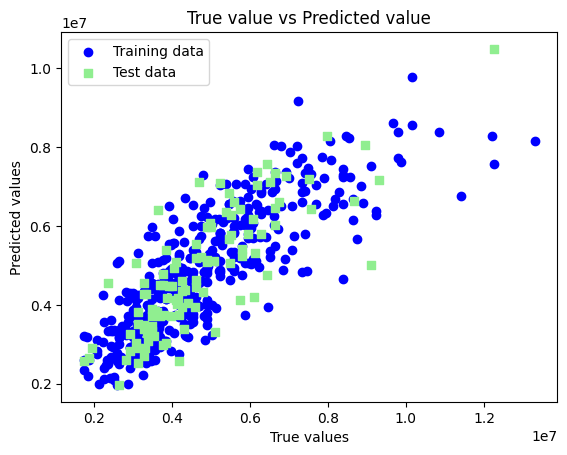

In [ ]:
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True value vs Predicted value')
plt.legend(loc='upper left')
plt.show()
